# Maps with geopandas

[https://geopandas.org/index.html](https://geopandas.org/index.html)

[https://juanitorduz.github.io/germany_plots/](https://juanitorduz.github.io/germany_plots/)

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

%matplotlib inline

In [ ]:
# show different styles available on system
plt.style.available

In [3]:
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df = gpd.read_file('data/plz/plz-gebiete.shp', dtype={'plz': str})


In [4]:
plz_shape_df.head()

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


## geopandas
use geopandas mapping tool to generate map with plot method

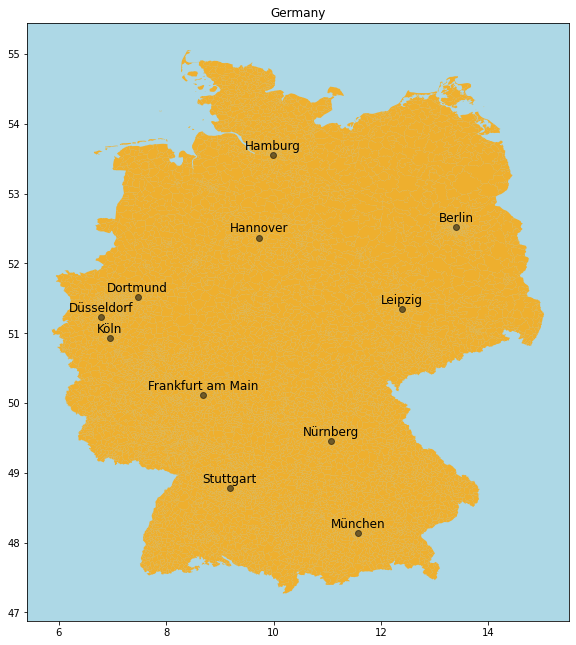

In [5]:
plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Köln': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'München': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nürnberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);

## First-Digit-Postalcodes Areas

Next, let us plot different regions corresponding to the first digit of each postal code.

In [7]:
# Create feature.
plz_shape_df = plz_shape_df \
    .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))

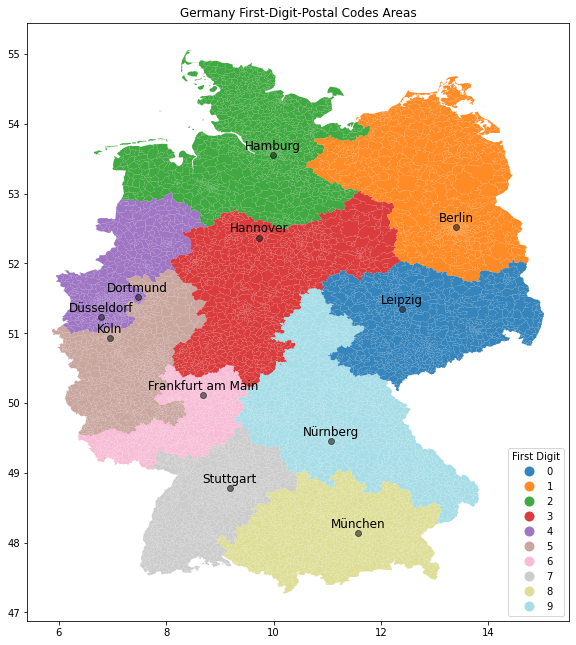

In [8]:
fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-Postal Codes Areas', 
    aspect=1.3,
    facecolor='white'
);

Bundesland Map

Let us now map each postal code to the corresponding region:

In [9]:
plz_region_df = pd.read_csv(
    'data/plz/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

,ort,plz,bundesland
0,Aach,78267,Baden-Württemberg
1,Aach,54298,Rheinland-Pfalz
2,Aachen,52062,Nordrhein-Westfalen
3,Aachen,52064,Nordrhein-Westfalen
4,Aachen,52066,Nordrhein-Westfalen


In [10]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

,plz,geometry,first_dig_plz,ort,bundesland
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Gangelt,Nordrhein-Westfalen
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Selfkant,Nordrhein-Westfalen
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",4,Kranenburg,Nordrhein-Westfalen
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Heinsberg,Nordrhein-Westfalen
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Waldfeucht,Nordrhein-Westfalen


## Generate Bundesland map:

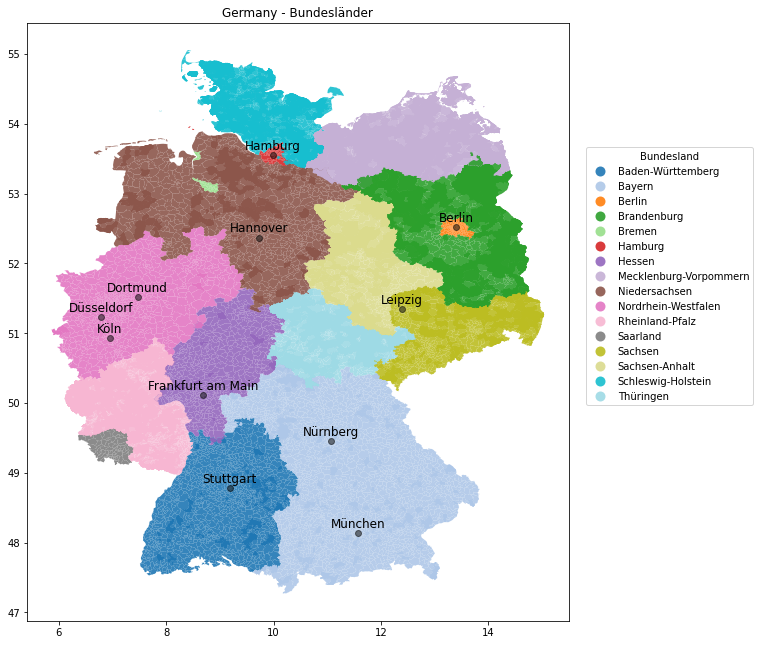

In [11]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Bundesländer', 
    aspect=1.3, 
    facecolor='white'
);

## Number of Inhabitants

Now we include the number of inhabitants per postal code:

In [16]:
plz_einwohner_df = pd.read_csv(
    'data/plz/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()

,plz,einwohner
0,01067,11957
1,01069,25491
2,01097,14821
3,01099,28018
4,01108,5876


In [17]:
# Merge data.
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

germany_df.head()

,plz,geometry,first_dig_plz,ort,bundesland,einwohner
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Gangelt,Nordrhein-Westfalen,21390
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Selfkant,Nordrhein-Westfalen,21390
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",4,Kranenburg,Nordrhein-Westfalen,10220
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Heinsberg,Nordrhein-Westfalen,49737
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Waldfeucht,Nordrhein-Westfalen,49737


## Generate map

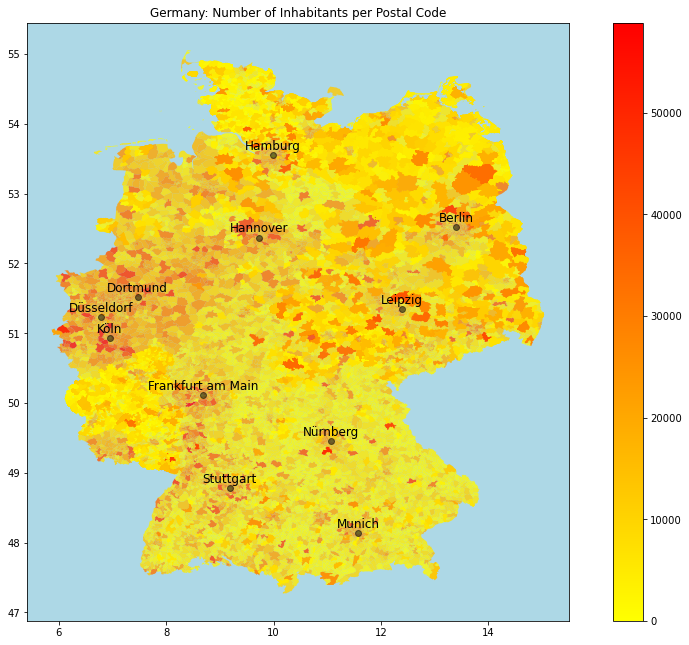

In [18]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);

## City Maps

We can now filter for cities using the ort feature.

KeyError: 'einwohner'

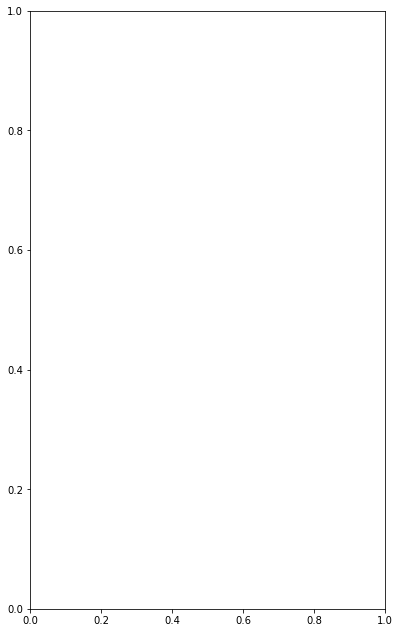

In [12]:
# Hamburg
hamburg_df = germany_df.query('ort == "Hamburg" and plz != "27499"') # Neuwerk excluded

fig, ax = plt.subplots()

hamburg_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Hamburg: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);

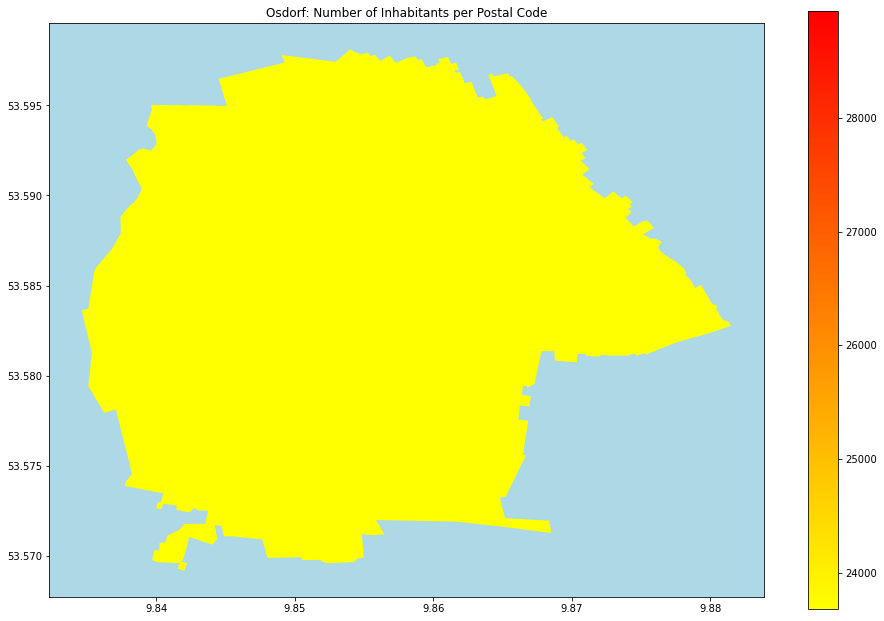

In [20]:
# 22549 Osdorf
osdorf_df = germany_df.query('plz == "22549"') 

fig, ax = plt.subplots()

osdorf_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Osdorf: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [21]:
from geopy import Nominatim

locator = Nominatim(user_agent='myGeocoder')

location = locator.geocode('Geomatikum')

print(location)

Geomatikum, 55, Bundesstraße, Rotherbaum, Eimsbüttel, Hamburg, 20146, Deutschland


## Let us write a function to get the latitude and longitude coordinates:

In [22]:
def lat_lng_from_string_loc(x):
    
    locator = Nominatim(user_agent='myGeocoder')

    location = locator.geocode(x)
    
    if location is None:
        None
    else:
        return location.longitude, location.latitude

In [23]:
# Define some well-known Berlin locations.
berlin_locations = [
    'Alexander Platz', 
    'Zoo Berlin', 
    'Berlin Tegel', 
    'Berlin Schönefeld',
    'Berlin Adlershof',
    'Olympia Stadium Berlin',
    'Berlin Südkreuz', 
    'Frei Universität Berlin',
    'Mauerpark', 
    'Treptower Park',
]

# Get geodata.
berlin_locations_geo = {
    x: lat_lng_from_string_loc(x) 
    for x in berlin_locations 
}

# Remove None.
berlin_locations_geo = {
    k: v 
    for k, v in berlin_locations_geo.items()
    if v is not None
}

In [24]:
# Define some well-known Hamburg locations.
hamburg_locations = [
    #'Fischmarkt Altona', 
    'Hagenbecks Tierpark', 
    'Airport Hamburg', 
    #'Rathaus Hamburg', 
    #'Binnenalster', 
    #'Stadpark Hamburg',
    #'Heinrich-Hertz-Turm',
    #'Landungsbrücken', 
    'Elbphilharmonie',
    #'Universität Hamburg',
    #'Planten und Bloomen', 
    #'Millerntor Stadion',
    #'Atlantic Hamburg',
    'Hamburg Hauptbahnhof',
]

# Get geodata.
hamburg_locations_geo = {
    x: lat_lng_from_string_loc(x) 
    for x in hamburg_locations 
}

# Remove None.
hamburg_locations_geo = {
    k: v 
    for k, v in hamburg_locations_geo.items()
    if v is not None
}

## Let´s see the map:

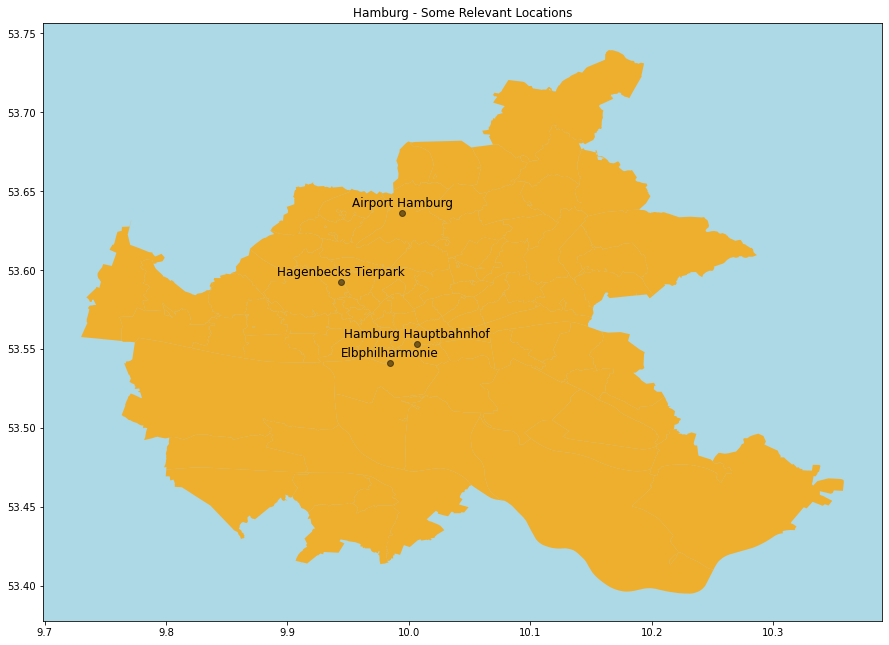

In [25]:
hamburg_df = germany_df.query('ort == "Hamburg" and plz != "27499"')

fig, ax = plt.subplots()

hamburg_df.plot(
    ax=ax, 
    color='orange', 
    alpha=0.8
)

for c in hamburg_locations_geo.keys():

    ax.text(
        x=hamburg_locations_geo[c][0], 
        y=hamburg_locations_geo[c][1] + 0.004, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        hamburg_locations_geo[c][0], 
        hamburg_locations_geo[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Hamburg - Some Relevant Locations', 
    aspect=1.3,
    facecolor='lightblue'
);

In [26]:
import fiona; help(fiona.open)


Help on function open in module fiona:

open(fp, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None, **kwargs)
    Open a collection for read, append, or write
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings like
    
      {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'W

In [27]:
hamburg_bezirke_df = gpd.read_file('data/plz/Stadtteile_-_Hamburg.geojson')

hamburg_bezirke_df.head()
#hamburg_bezirke_df = hamburg_bezirke_df \
#    [~ hamburg_bezirke_df['neighbourhood_group'].isnull()] 

,geometry


# World maps

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


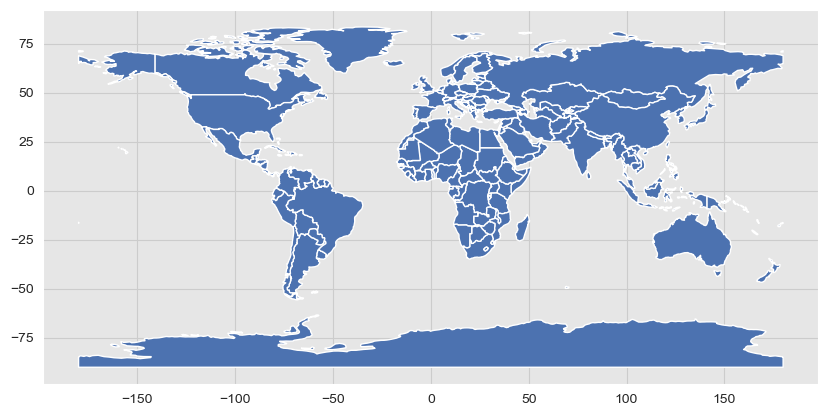

In [ ]:
world.plot();

/usr/local/Caskroom/miniconda/base/envs/mach_lern/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


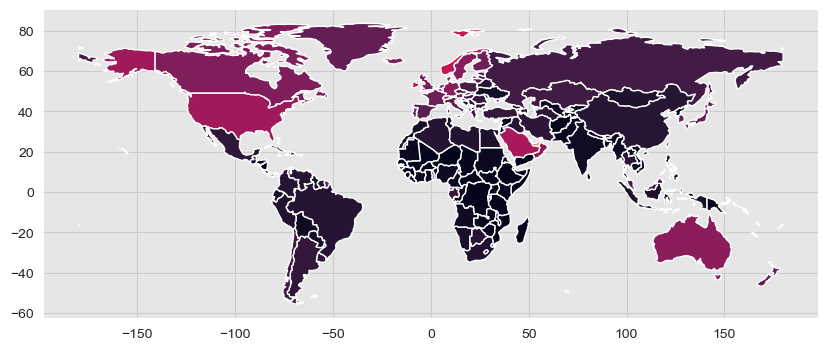

In [ ]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap');